## Перевод изображений в единый формат, создание набора данных. 
Сперва найдем наименьший формат среди имеющихся через цикл. Затем сожмем все файлы до такого же размера. После этого можно будет перевести фотографии в признаковое описание. Как именно? Каждый пиксель в формате RGB имеет свое значение. Так, мы можем перевести пиксель в значение, а их все в вектор.

**Наименьший формат**

В первую очередь соберем названия всех файлов из облака google для простоты их использования 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from os import listdir
from os.path import isfile, join
mypath = 'H:\\Учёба\\Уирс\\3 сем\\Img_city'
lst_of_cities = [f for f in listdir(mypath) if isfile(join(mypath, f))][1:]

In [5]:
len(lst_of_cities)

123

Теперь, когда названия файлов хранятся отдельно в списке, мы можем начинать работу с ними. Попробуем найти наименьшее разрешение.

In [ ]:
from PIL import Image

In [15]:
lst_of_cities_images = {}
sizes = []
modes = []
for i in lst_of_cities:
    
    myimage = Image.open('H:\\Учёба\\Уирс\\3 сем\\Img_city' + "\\" + i)  
    myimage.load()
    lst_of_cities_images[i] = myimage
    sizes.append(myimage.size)
    modes.append(myimage.mode)

Из полученного списка значений разрешений найдем минимальное

In [4]:
min_size = min(sizes)
min_size

(604, 448)

Теперь приведем все остальные картинки к этому же разрешению и сохраним в одну папку

In [9]:
names_of_pictures = []
for i in range(len(lst_of_cities)):
    lst = lst_of_cities[i].split('.')
#     size = min_size
#     saved = lst_of_cities[i]
#     img = Image.open('H:\\Учёба\\Уирс\\3 сем\\Img_city' + '\\' + lst_of_cities[i])
#     img.thumbnail(size)
#     img.save('H:\\Учёба\\Уирс\\3 сем\\Img_city_1' + '\\' + lst[0] + 'miniature.' + lst[1])
    names_of_pictures.append(lst[0] + 'miniature.' + lst[1])

Проверим минимальное разрешение среди всех новых файлов

In [7]:
# нужно создать список с наборами пикселей для каждой картинки, используя 
# метод ".getdata()"
sizes_1 = []
modes_1 = []
for i in names_of_pictures:
    myimage = Image.open('H:\\Учёба\\Уирс\\3 сем\\Img_city_1' + "\\" + i)  
    myimage.load()
    
    sizes_1.append(myimage.size)
    modes_1.append(myimage.mode)

In [8]:
min_a, min_b = min_size[0], min_size[1]
for i in sizes_1:
    min_a = min(min_a, i[0])
    min_b = min(min_b, i[1])

In [9]:
min_a, min_b

(589, 410)

In [10]:
import numpy as np
arr = np.asarray(myimage, dtype='uint8')

In [11]:
myimage.size

(604, 426)

Часть ниже посвящена попытке перевода пикселей одной картинки в признаковое описание.

In [41]:
# нужно создать список с наборами пикселей для каждой картинки, используя 
# описанный ниже метод ".getdata()"
pixels = list(myimage.getdata())

for i in range(len(pixels)):
    pixels[i] = pixels[i][:3]

In [17]:
len(pixels)

257304

In [23]:
# убедимся в том, что количество пикселей соответсвует значению выше
myimage.size[0] * myimage.size[1]

257304

In [20]:
names_of_pictures[-1]

'Ярославльminiature.png'

Теперь нужно попробовать составить признаковое описание двумя способами:

а) сделать просто из имеющихся картинок признаковые описания, надеясь на создание пропусков;

б) обрезать каждую картинку по минимальным размерам: (min_a, min_b)

In [51]:
import pandas as pd

In [1]:
# # данная часть кода выполняется крайне долго, поэтому мы будем использовать другой метод
# %%time
# data = pd.DataFrame()
# for j in range(len(pixels)):
#     for i in range(3):
#         data[str(j)+ 'pixel' + str(i)] = pd.Series(pixels[j][i])
# data

Возьмем те же самые файлы, но будем информацию о них хранить в другом типе данных. Размер, к которому нужно привожить также возьмем другой. Кроме всего прочего будем использовать другую библиотеку для сжатия файлов - PyTorch.

In [2]:
import torchvision.transforms as tt

In [27]:
# lst_of_cities_images_minized - словарь сжатых картинок
lst_of_cities_images_minized = {}
for k, jpeg in lst_of_cities_images.items():
    lst_of_cities_images_minized[k] = tt.Resize((125, 125))(jpeg)

In [28]:
px = lst_of_cities_images_minized[k].getdata()

In [29]:
(len(px), k)

(15625, 'Ярославль.png')

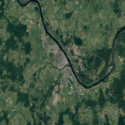

In [30]:
lst_of_cities_images_minized[k]

In [34]:
import numpy as np

In [47]:
px = list(px)

In [48]:
for i in range(len(px)):
    px[i] = px[i][:3]

In [57]:
%%time
data = pd.DataFrame()
for j in range(len(px)):
    for i in range(3):
        data[str(j)+ 'pixel' + str(i)] = pd.Series(pixels[j][i])
data

Wall time: 31min 38s


,0pixel0,0pixel1,0pixel2,1pixel0,1pixel1,1pixel2,2pixel0,2pixel1,2pixel2,3pixel0,...,15621pixel2,15622pixel0,15622pixel1,15622pixel2,15623pixel0,15623pixel1,15623pixel2,15624pixel0,15624pixel1,15624pixel2
0,18,50,39,12,44,34,18,49,41,21,...,28,6,26,33,6,26,34,6,26,34


In [80]:
data.to_csv('vect_prostr')

In [81]:
pd.read_csv('vect_prostr')

,Unnamed: 0,0pixel0,0pixel1,0pixel2,1pixel0,1pixel1,1pixel2,2pixel0,2pixel1,2pixel2,...,15621pixel2,15622pixel0,15622pixel1,15622pixel2,15623pixel0,15623pixel1,15623pixel2,15624pixel0,15624pixel1,15624pixel2
0,0,18,50,39,12,44,34,18,49,41,...,28,6,26,33,6,26,34,6,26,34
